In [12]:
df = pd.read_csv(r"C:\Users\lasya\OneDrive\Desktop\DS PROJECT\ds project2\crime_dataset.csv") 


=== Data Summary ===
   crime_type  prior_convictions  age  restitution_paid  victim_harm  sentence
0           3                  0   25              True            1         1
1           0                  2   32             False            0         0
2           1                  1   45             False            2         0
3           3                  0   19              True            1         1
4           2                  3   50             False            0         0


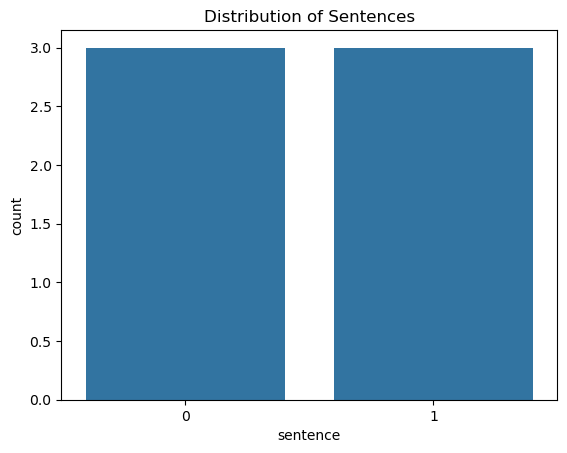

In [ ]:



# Exploratory Data Analysis (EDA)
print("\n=== Data Summary ===")
print(df.head())

sns.countplot(x='sentence', data=df)
plt.title("Distribution of Sentences")
plt.show()



